<a href="https://colab.research.google.com/github/Atysatya20/Atysatya20/blob/master/Modul_OpenCV_Aksara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**PENGENALAN OPENCV**


OpenCV merupakan salah satu modul Python yang digunakan untuk pengolahan citra pada level rendah. Maksudnya, OpenCV menyediakan fungsi-fungsi yang paling mendasar hingga cukup kompleks untuk pengolahan citra dalam computer vision.


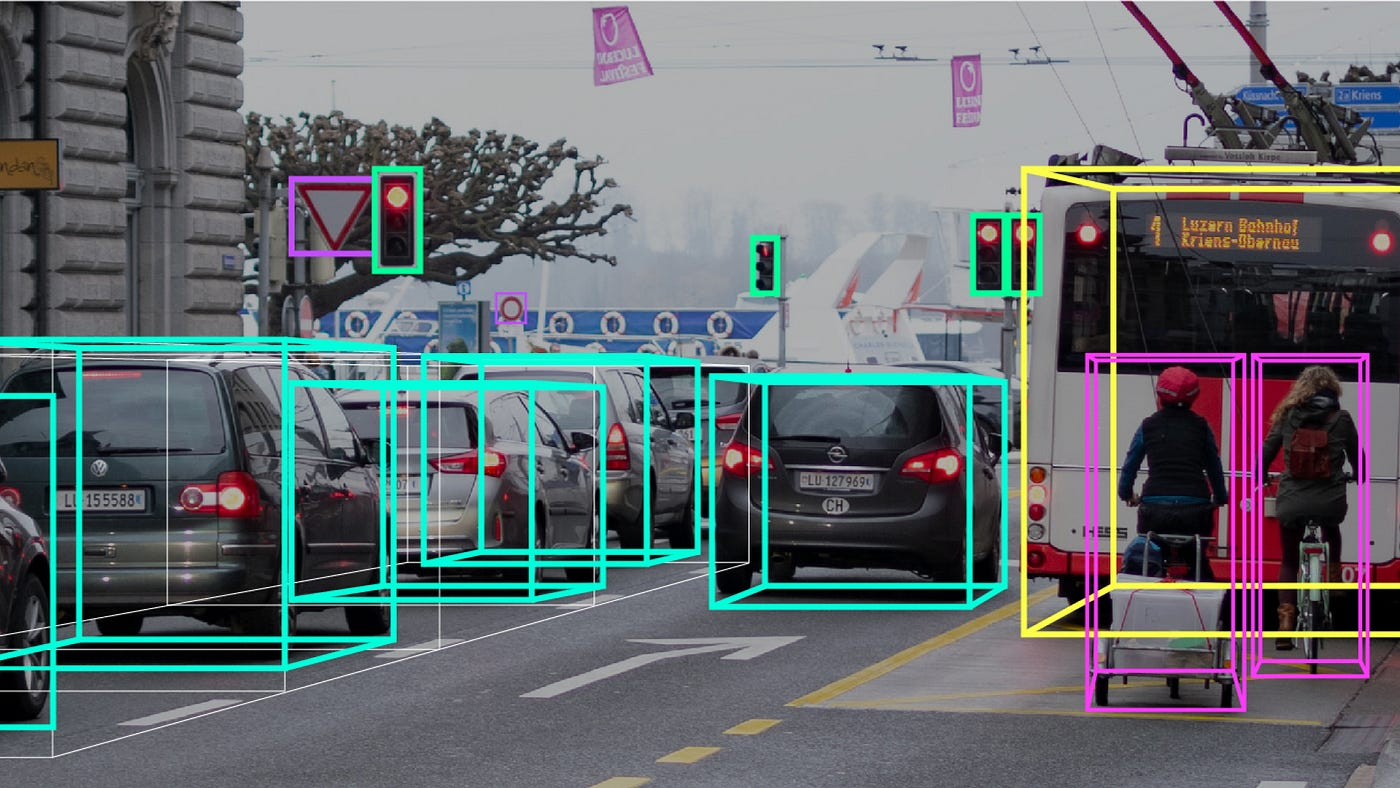

Untuk memulai pelatihan, silahkan tekan tombol "Choose File" untuk mengupload gambar yang akan digunakan. Untuk data yang digunakan dapat diakses pada link berikut

In [ ]:
# upload file yang sudah diunduh
# file akan disimpan sesuai dengan nama file yang diunggah
from google.colab import files
file = files.upload()

Setelah mengunggah file ke tombol di atas, kita dapat lakukan cek untuk memeriksa isi dari folder. Untuk melakukan pengecekan dapat digunakan baris perinal ls yang merupakan baris perintah linux untuk dapat mengutahui list dan isi dari direktori yang digunakan

In [ ]:
!ls

Dapat kita lihat bahwa file telah berhasil diunggah pada folder tempat Google Colab ini dijalankan. Selanjutnya, kita dapat memanggil file tersebut untuk pengolahan dengan OpenCV.

### **MENGGUNAKAN OPENCV**

Untuk menggunakan OpenCV, kita akan memanggil fungsi **cv2** dari library OpenCV versi 4 yang sudah tersedia pada Google Colab. Kita langsung dapat memanggil modul-modul **cv2** menggunakan perintah:

```
import cv2
```

Khusus untuk penggunaan OpenCV di Google Colab, terdapat satu fungsi yang memerlukan *patch* atau perbaikan, yaitu ```cv2.imshow()```. Fungsi ini digunakan untuk menampilkan gambar pada OpenCV. Di Google Colab, fungsi ini digantikan dengan baris perintah berikut:

``` from google.colab.patches import cv2_imshow ```

selanjutnya fungsi ```cv2.imshow()``` digantikan dengan fungsi ```cv2_imshow()```.

Untuk mencoba, jalankan baris perintah berikut:

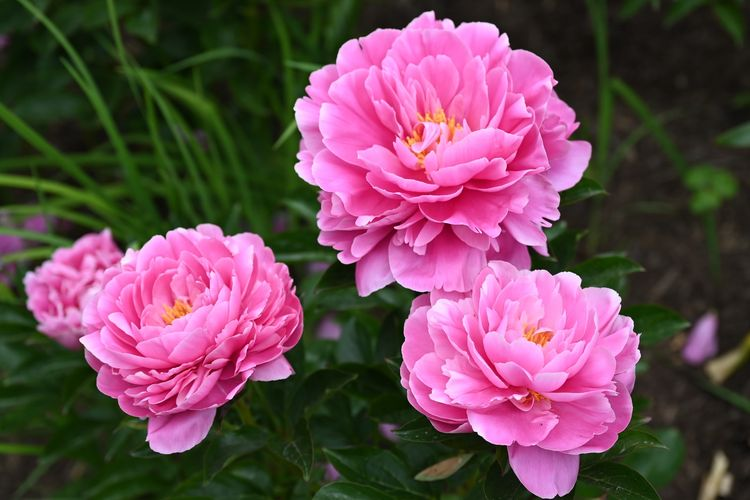

<class 'numpy.ndarray'>


In [ ]:
# memanggil library opencv
import cv2

# memanggil fungsi google colab untuk perbaikan cv2.imshow
from google.colab.patches import cv2_imshow

# menyimpan gambar dengan fungsi imread dari OpenCV
img = cv2.imread("Bunga.jpg")
# sesuaikan dengan nama file yang diunggah pada cell sebelumnya

# menampilkan gambar dengan fungsi cv2_imshow
cv2_imshow(img)

# lihat tipe data img. disimpan sebagai apa?
print(type(img))


**Keterangan:**

*import*	adalah fungsi Python untuk memanggil modul di luar fungsi dasar yang disediakan

*cv2*	adalah nama modul Python yang digunakan untuk memanggil fungsi-fungsi OpenCV

*numpy*	modul Python untuk pengolahan matriks (ingat bahwa citra pada OpenCV dianggap sebagai matrix)
matplotlib	modul Python untuk melakukan fungsi plotting

*cv2.imread*	perintah yang digunakan pada modul cv2 untuk memanggil citra

*cv2_imshow*	perintah yang digunakan pada modul cv2 untuk menampilkan citra. Argumen yang diperlukan adalah nama  citra yang dipanggil

Perintah di atas menggunakan *cv2.imread* untuk memanggil citra. Pada script di atas,

```img = cv2.imread('Bunga.jpg')```

menunjukkan bahwa citra ‘Bunga`.jpg’ disimpan pada variable bernama ```img```.

Selain fungsi **imshow** di atas, dapat digunakan juga Matplotlib untuk menampilkan gambar. Kode yang digunakan adalah ```plt.imshow()``` dengan terlebih dulu memanggil fungsi ```plt``` dari library Matplotlib:

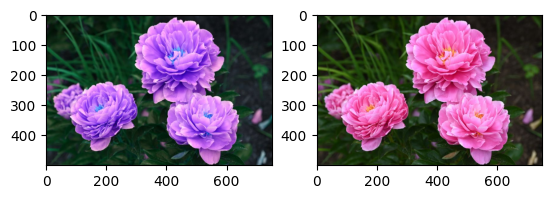

In [ ]:
# memanggil fungsi plt dari matplotlib
from matplotlib import pyplot as plt

# membuat sebuah variabel kosong 'fig'
fig = plt.figure()
fig.add_subplot(121)
# subplot (jumlah baris, jumlah kolom, urutan)

# menampilkan gambar dengan fungsi plt
plt.imshow(img)

# plotting gambar
fig.add_subplot(122)
# subplot, formatnya: (jumlah baris, jumlah kolom, urutan)
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img2)


plt.show() #untuk menampilkan plot

In [ ]:
print(img.shape) #menampilkan resolusi
print(img.size) #menampilkan ukuran data pada media penyimpan
print(img.dtype) #image datatype (kedalaman bit)

(500, 750, 3)
1125000
uint8


### **EKSTRAKSI BAND CITRA**

Sebuah citra dapat dipecah pada band penyusunnya dengan menggunakan perintah ```cv2.split()```.

In [ ]:
# Band blue, green dan red masng-masing disimpan pada variabel b,g,r
b, g, r = cv2.split(img)

atau bisa juga dengan menggunakan operasi index pada matriks img:

In [ ]:
b = img[...,0]  # blue channel
g = img[...,1]  # green channel
r = img[...,2]  # red channel

Perhatikan bagaimana tiap band disusun pada variabel yang menyimpan gambar: *masing-masing band disusun sebagai sebuah array di dalam array*. Ingat bahwa pada Python, index sebuah array **dimulai dari angka nol**.

Selanjutnya masing-masing band dapat ditampilkan dengan menggunakan ```cv2_imshow``` atau ```plt.imshow```:

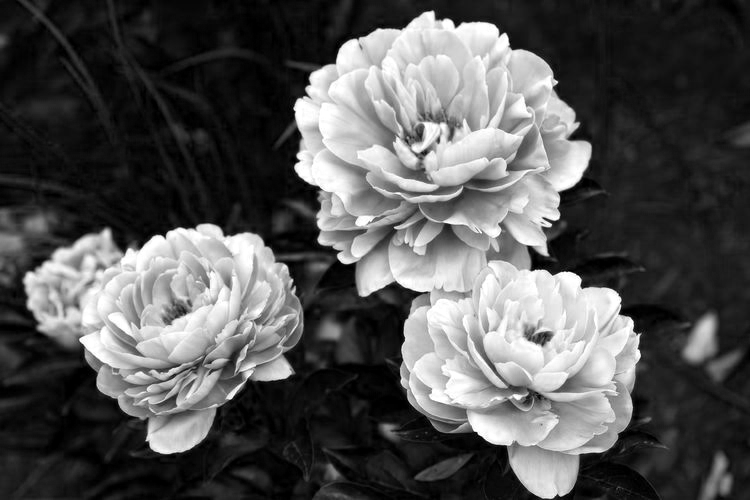

In [ ]:
cv2_imshow(b); # menampilkan band biru

### **TRANSFORMASI COLORSPACE**

Citra pada OpenCV disimpan dalam susunan BGR (*Blue, Green, Red*). Adakalanya untuk berbagai keperluan perlu dilakukan transformasi colorspace BGR menjadi format lain, misalnya HSV (*Hue Saturation Value*). Penggunaan Colorspace HSV bertujuan untuk mendekati bagaimana cara mata manusia mengenali warna. Contoh penggunaannya adalah untuk melakukan ekstraksi objek berdasarkan warna dan kecerahannya.

> Pelajaran yang dapat diambil adalah bahwa tiap program pengolah citra dapat memiliki susunan *colorspace* yang berbeda. Perhatikan bagaimana pengaruh susunan band ini terhadap komposit citra yang dihasilkan

Fungsi yang digunakan untuk melakukan transformasi adalah ```cv2.cvtColor()```

In [ ]:
# konversi BGR dari variable img ke colorspace HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV);

Fungsi di atas mentransformasi citra 'img' ke dalam kelas warna HSV menggunakan fungsi COLOR_BGR2HSV. Hasil konversi juga dapat dipecah ke dalam masing-masing band:

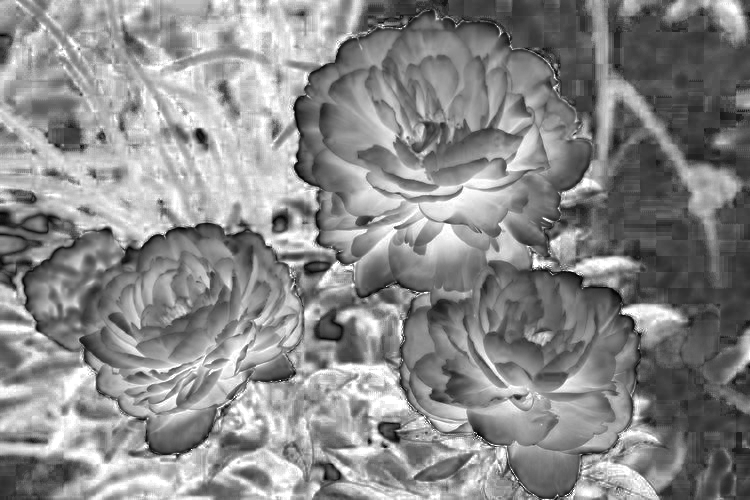

In [ ]:
# memisahkan hue, saturation dan value
h, s, v = cv2.split(hsv)

# menampilkan band hue
cv2_imshow(s)

###**MENAMPILKAN HISTOGRAM CITRA**

Histogram dapat ditampilkan dengan menggunakan banyak cara. Fungsi yang dapat digunakan antara lain ```cv2.calcHist()```, ```np.histogram()``` dan ```plt.hist()```.

Adapun parameter untuk fungsi cv2.calcHist() adalah sebagai berikut:

```cv.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])```

* images : gambar yang dibaca menggunakan fungsi cv.read dengan type uint8 or float32. Gambar ini harus dinyatakan sebagai sebuah array dengan kurung siku "[img]".
* channels : band yang akan dihitung histogramnya. Gunakan [0] untuk citra *grayscale*. Untuk citra berwarna, kita dapat berikan nilai [0], [1] atau [2] untuk menghitung histogram dari masing-masing band.
* mask : digunakan apabila kita ingin memperoleh histogram dari sebagian citra saja.
* histSize : Ukuran histogram, atau banyaknya kolom yang digambar. Kita dapat gunakan nilai sesuai dengan jumlah pixel [256].
* ranges : rentang nilai. Pada citra 8 bit, nilainya adalah [0,256].

Berikut adalah contoh kode untuk memanggil histogram:

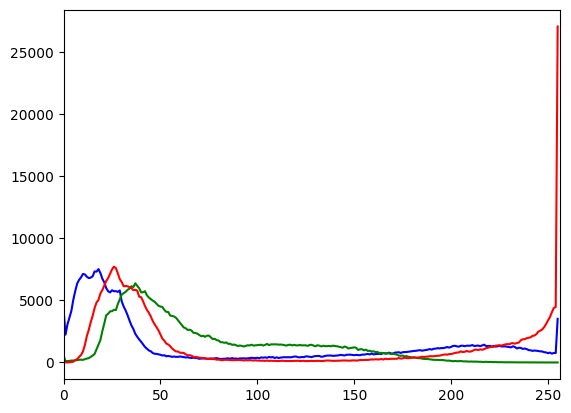

In [ ]:
# memanggil library yang dibutuhkan
import cv2
import numpy as np
from matplotlib import pyplot as plt

# jika file baymax.jpg yang digunakan, hilangkan tanda komentar
# img = cv2.imread(‘Baymax.jpg')

color = ('b','g','r')
for i,col in enumerate(color):
  histr = cv2.calcHist([img],[i],None,[256],[0,256])
  plt.plot(histr,color = col)
  plt.xlim([0,256])
plt.show()

Pada fungsi di atas, ```cv2.calcHist()``` digunakan untuk menghitung histogram, sedangkan ```plt.plot()``` digunakan untuk menampilkan histogram yang telah dihitung. Fungsi for adalah perulangan (loop) pada Python.

###**EKSTRAKSI OBJEK DENGAN WARNA MENGGUNAKAN OPENCV**

Salah satu contoh penggunaan ekstraksi warna adalah untuk memisahkan objek berdasarkan warnanya.

![](https://htmlcolors.com/img/colorhsvprincipal.png)


Jika Anda bertanya-tanya mengapa kita perlu melakukan transformasi colospace, maka gambar di atas adalah jawabannya. Pada colorspace HSV, kita dapat memisahkan objek berdasarkan warnanya: Band Hue sendiri telah mewakili seluruh warna yang ada. Jika kita memilih nilai tertentu dari rentang warna ini, kita dapat dengan mudah melakukan ekstraksi objek berdasarkan warnanya.

Sebagai referensi, berikut adalah rentang warna pada band Hue:

![Rentang Hue](https://upload.wikimedia.org/wikipedia/commons/thumb/a/ad/HueScale.svg/360px-HueScale.svg.png)

Untuk memilih objek jeruk dari gambar di atas, kita dapat lakukan seleksi pada band hue dari nilai piksel yang mendekati warna orange pada jeruk, yaitu antara 5-72. Pada kode di bawah, kita menggunakan fungsi *widget* yang disediakan oleh Google Colab untuk membuat seleksi nilai hue ini dapat dilakukan secara otomatis.

gambar asal


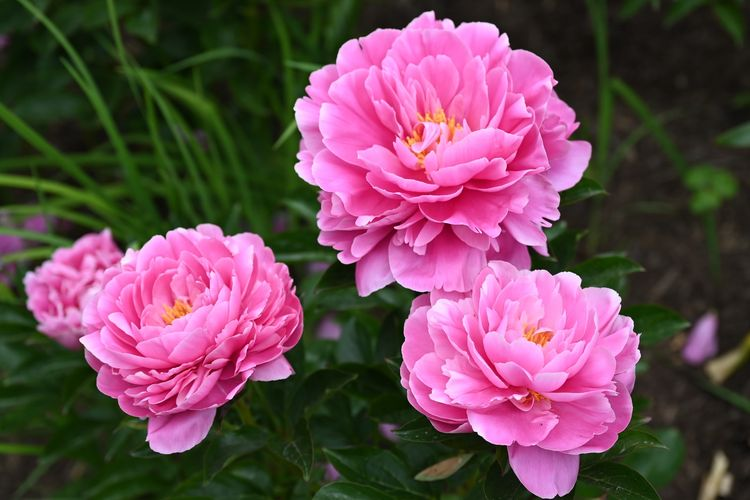

masking warna


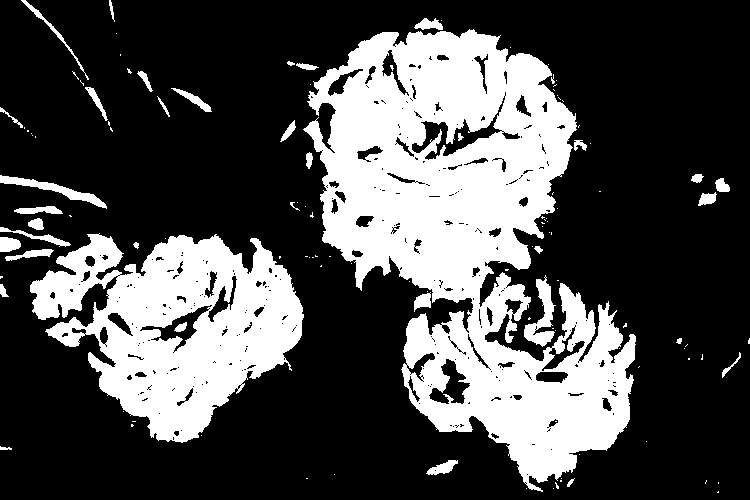

hasil operasi


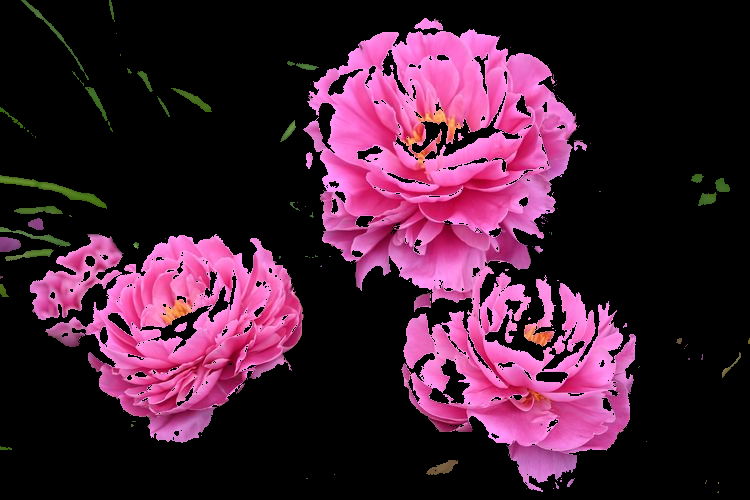

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Membaca citra 'Bunga.jpg' yang sudah diunggah sebelumnya.
img = cv2.imread('Bunga.jpg')


hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV);

# slider adalah salah satu fungsi Google Colab
# 3 dan 27 adalah batas warna orange pada band hue
# rubah slider untuk mencoba hasil akhir yang berbeda
batas_bawah = 0 #@param {type:"slider", min:0, max:360, step:1}
batas_atas = 360 #@param {type:"slider", min:0, max:360, step:1}

# definisi batas warna orange. perhatikan variabel batas_bawah dan batas_atas
lower_orange = np.array([batas_bawah,100,100])
upper_orange = np.array([batas_atas,255,255])

# membuat masking untuk mencari objek sesuai batas warna
mask = cv2.inRange(hsv, lower_orange, upper_orange)

# Operasi Bitwise-AND
res = cv2.bitwise_and(img, img, mask=mask)

# cetak hasil ke layar
print("gambar asal")
cv2_imshow(img);

print("masking warna")
cv2_imshow(mask)

print("hasil operasi")
cv2_imshow(res)

##**TEMPLATE MATCHING**

Pada bagian ini kita akan menggunakan salah satu fungsi OpenCV  untuk mendeteksi posisi wajah dari serangkaian gambar. Algoritma ini disebut sebagai 'Template Matching'.  OpenCV menyediakan fungsi `cv2.matchTemplate()` untuk keperluan Template Matching ini dengan berbagai metode deteksi berdasarkan tingkat kemiripan antara `template` atau gambar yang dicari dengan objek pada gambar yang tersedia , misalnya dengan menghitung rerata korelasi antar nilai piksel pada template tersebut dengan objek yang dicari.

Silahkan upload gambar sampel sawit dalam tombol "Choose files"

In [ ]:
# upload file yang sudah diunduh
# file akan disimpan sesuai dengan nama file yang diunggah
from google.colab import files
file = files.upload()

Saving Sawit1.PNG to Sawit1 (1).PNG


Kemudian, silahkan upload gambar area sawit yang akan dideteksi dengan menekan tombol "Choose Files"

In [ ]:
# upload file yang sudah diunduh
# file akan disimpan sesuai dengan nama file yang diunggah
from google.colab import files
file = files.upload()

Saving CitraSawit.jpg to CitraSawit (1).jpg


Ubah bagian penamaan file persis dengan nama file yang diupload

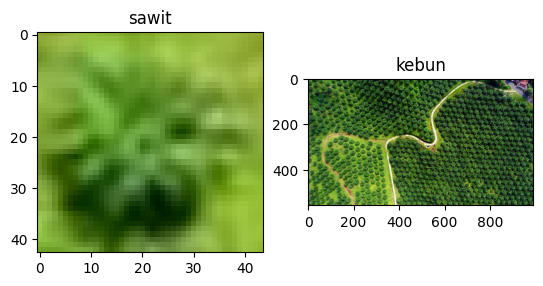

In [ ]:
# tampilkan kedua gambar
from matplotlib import pyplot as plt

# panggil dan konversi warna agar sesuai dengan Matplotlib
sawit = cv2.imread('Sawit1.PNG')
sawit =  cv2.cvtColor(sawit, cv2.COLOR_BGR2RGB)

# panggil dan konversi warna agar sesuai dengan Matplotlib
kebun_sawit = cv2.imread('CitraSawit.jpg')
kebun_sawit =  cv2.cvtColor(kebun_sawit, cv2.COLOR_BGR2RGB)

plt.subplot(121),plt.imshow(sawit), plt.title('sawit')
plt.subplot(122),plt.imshow(kebun_sawit), plt.title('kebun')
plt.show()

Pada contoh script di bawah, kita akan menggunakan template matching untuk menentukan jumlah pohon sawit berdasarkan template sawit seperti di atas. Parameter threshold di bawah menentukan seberapa mirip keypoint yang ingin kita deteksi berdasarkan template, sehingga kita dapat merubah nilai tersebut untuk mendapatkan jumlah yang lebih optimal.

Jumlah objek ditemukan  58


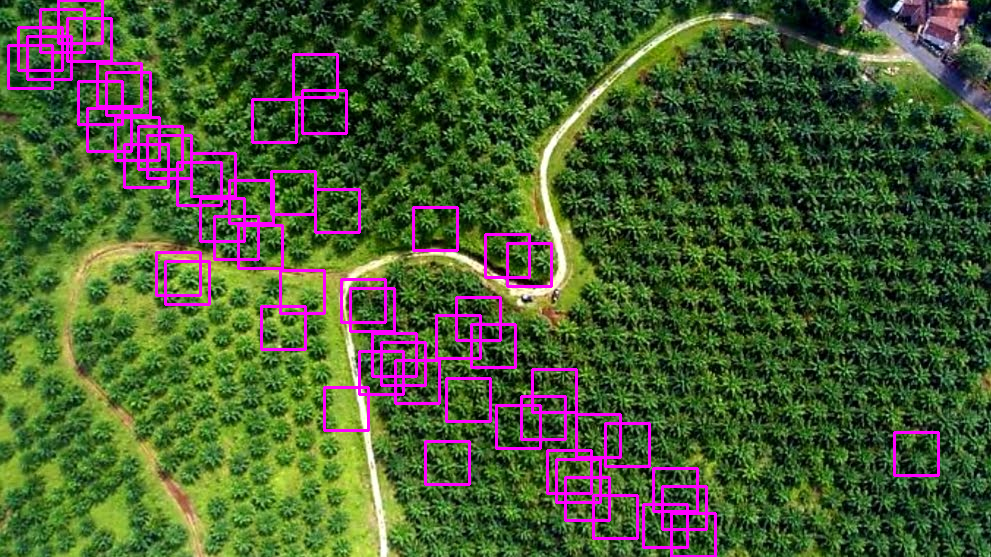

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

## membaca gambar utuh untuk dicari
img_rgb = cv2.imread('CitraSawit.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

## membaca template
template = cv2.imread('Sawit1.PNG',0)

## ukuran template. ukuran ini akan digunakan untuk menggambar kotak
w, h = template.shape[::-1]

# menggunakan metode COEFF-NORMALIZED
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)

# Nilai threshold atau ambang batas deteksi kemiripan titik.
# Lakukan eksperimen dengan merubah nilai ini
threshold = 0.5
loc = np.where(res >= threshold)

## membuat array kosong untuk menyimpan lokasi-lokasi dari hasil deteksi
lspoint=[]
lspoint2=[]
count = 0  # untuk menyimpan jumlah matching yang ditemukan
for pt in zip(*loc[::-1]):
	## jika sudah ada, skip lokasi tersebut
	if pt[0] not in lspoint and pt[1] not in lspoint2:
		## gambar persegi dengan ketebalan dua poin
		cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (255,0,255), 2)
		for i in range(((pt[0])-9), ((pt[0])+9),1):
			## tambahkan koordinat x ke list
			lspoint.append(i)
		for k in range(((pt[1])-9), ((pt[1])+9),1):
			## tambahkan koordinat y ke list
			lspoint2.append(k)
		count+=1 ### berapa jumlah matching yang ditemukan?
	else:
		continue
print ("Jumlah objek ditemukan ", count)

## tampilkan dengan imshow
cv2_imshow(img_rgb)